In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv("Ice_cream selling data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [4]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['Temperature (°C)']],df['Ice Cream Sales (units)'],train_size=0.8,random_state=42)

In [6]:
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
print(f"Train score : {model.score(xtrain,ytrain)}")
print(f"Test score : {model.score(xtest,ytest)}")

Train score : 1.0
Test score : 0.8148353325075832


### Student Performance

In [8]:
df = pd.read_csv('Student_Performance.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: ylabel='Performance Index'>

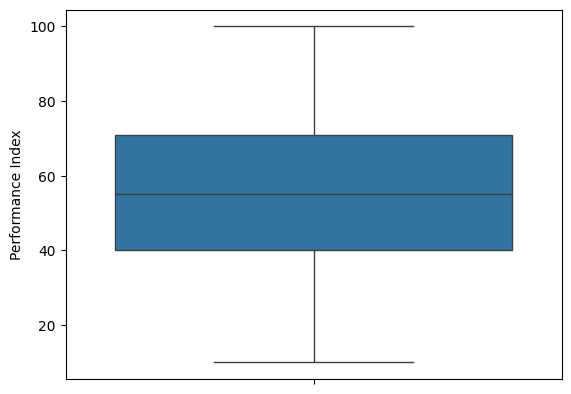

In [11]:
sns.boxplot(df['Performance Index'])

In [12]:
X = df.drop('Performance Index',axis=1)
y = df['Performance Index']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [13]:
preprocessing = ColumnTransformer(
    transformers=[
        ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['Extracurricular Activities']), 
    ],remainder='passthrough'
)
pipeline = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor())
    ]
)
pipeline.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
#absoulte_error
'''.
Train score : 0.9992917164456249
Test score : 0.9758098757533479
'''
#squared_error
'''.
Train score : 0.9993046004930477
Test score : 0.9760495492874691
'''

'.\nTrain score : 0.9993046004930477\nTest score : 0.9760495492874691\n'

In [15]:
print(f"Train score : {pipeline.score(xtrain,ytrain)}")
print(f"Test score : {pipeline.score(xtest,ytest)}")

Train score : 0.9993046004930477
Test score : 0.97641721111229
